In [2]:
%cd ~/SSMuLA

/disk2/fli/SSMuLA


In [3]:
%load_ext autoreload
%autoreload 2
%load_ext blackcellmagic

Loading BokehJS ...

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
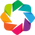

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from SSMuLA.de_simulations import DE_COLORS, DE_TYPES, DE_LEGEND_MAP
from SSMuLA.vis import PRESENTATION_PALETTE_SATURATE, LIB_COLORS
from SSMuLA.zs_analysis import (
    ZS_OPTS,
    ZS_COMB_OPTS,
    ZS_OPTS_LEGEND,
)

%matplotlib inline

In [5]:
N_SAMPLE_LIST = [24, 48, 96, 192, 288, 384, 480, 576, 960, 1920]

In [6]:
lib_stat  = pd.read_csv("results/corr_all/384/boosting|ridge-top96/merge_all.csv")

In [7]:
mlde_all = pd.read_csv("results/mlde/all_df_comb_onehot.csv")
de_all = pd.read_csv("results/de/DE-active/scale2max/all_landscape_de_summary.csv")

In [8]:
active_cutoff = 1
active_lib_list = lib_stat[lib_stat["percent_active"]>active_cutoff]["lib"].tolist()

In [9]:
mlde_all.columns

Index(['encoding', 'model', 'n_sample', 'ft_lib', 'rep', 'all_maxes',
       'all_means', 'top_maxes', 'top_means', 'ndcgs', 'rhos', 'if_truemaxs',
       'truemax_inds', 'n_mut_cutoff', 'lib', 'zs', 'n_top', 'scale_fit'],
      dtype='object')

In [10]:
def get_mlde_avg_df(mlde_all, n_top, n_mut_cutoff, zs, active_lib_list):
    avg_mlde = mlde_all[
        (mlde_all["lib"].isin(active_lib_list))
        & (mlde_all["zs"] == zs)
        & (mlde_all["n_top"] == n_top)
        & (mlde_all["n_mut_cutoff"] == n_mut_cutoff)
    ][["n_sample", "top_maxes", "if_truemaxs"]].groupby("n_sample").agg(["mean", "std"]).reset_index()
    avg_mlde.columns = ['{}_{}'.format(i, j) for i, j in avg_mlde.columns]
    avg_mlde = avg_mlde.rename(columns={'n_sample_': 'n_sample'})
    return avg_mlde

In [11]:
ZS_OPTS

['ed_score', 'Triad_score', 'ev_score', 'esm_score', 'esmif_score']

In [12]:
n_top = 96
avg_mlde_df_dict = {}

# just mlde
avg_mlde_df_dict["MLDE"] = get_mlde_avg_df(
    mlde_all, n_top, n_mut_cutoff="all", zs="none", active_lib_list=active_lib_list
)
avg_mlde_df_dict["ftMLDE: Edited distance"] = get_mlde_avg_df(
    mlde_all, n_top, n_mut_cutoff="double", zs="none", active_lib_list=active_lib_list
)

for zs in ZS_OPTS[1:]:
    avg_mlde_df_dict[f"ftMLDE: {ZS_OPTS_LEGEND[zs]}"] = get_mlde_avg_df(
        mlde_all, n_top, n_mut_cutoff="all", zs=zs, active_lib_list=active_lib_list
    )

In [13]:
de_all[de_all["lib"].isin(active_lib_list)]

,lib,de_type,max,mean_all,median_all,mean_top96,median_top96,mean_top384,median_top384,fraction_max,numb_path
0,DHFR,single_step_DE,1.0,0.889922,0.857847,1.000000,1.000000,1.000000,1.000000,0.283568,5124
1,DHFR,recomb_SSM,1.0,0.851463,0.847249,0.999315,1.000000,0.949198,0.959943,0.090164,854
2,DHFR,top96_SSM,1.0,0.959305,1.000000,1.000000,1.000000,1.000000,1.000000,0.632319,854
3,GB1,single_step_DE,1.0,0.571523,0.597319,1.000000,1.000000,1.000000,1.000000,0.026045,829080
4,GB1,recomb_SSM,1.0,0.362927,0.370170,0.978695,1.000000,0.887291,0.862211,0.002055,34545
5,GB1,top96_SSM,1.0,0.611348,0.620935,1.000000,1.000000,1.000000,1.000000,0.025040,34545
6,ParD2,single_step_DE,1.0,0.959795,1.000000,1.000000,1.000000,1.000000,1.000000,0.560539,39198
7,ParD2,recomb_SSM,1.0,0.946246,0.975940,1.000000,1.000000,1.000000,1.000000,0.285168,6533
8,ParD2,top96_SSM,1.0,0.989515,1.000000,1.000000,1.000000,1.000000,1.000000,0.722639,6533
9,ParD3,single_step_DE,1.0,0.979911,0.986720,1.000000,1.000000,1.000000,1.000000,0.282883,43488


In [14]:
de_avg = (
    de_all[de_all["lib"].isin(active_lib_list)][["de_type", "mean_all", "fraction_max"]]
    .groupby("de_type")
    .agg(["mean", "std"])
)
de_avg.columns = ["{}_{}".format(i, j) for i, j in de_avg.columns]
de_avg = de_avg.rename(columns={"de_type_": "de_type"})
de_avg

,mean_all_mean,mean_all_std,fraction_max_mean,fraction_max_std
de_type,,,,
recomb_SSM,0.651461,0.234586,0.127690,0.138444
single_step_DE,0.717242,0.208549,0.268657,0.178099
top96_SSM,0.794771,0.213990,0.419596,0.263200


In [15]:
len(active_lib_list)

10

Text(0.5, 0.95, '(ft)MLDE vs DE Average performance Across 10 Minimally Active Landscapes')

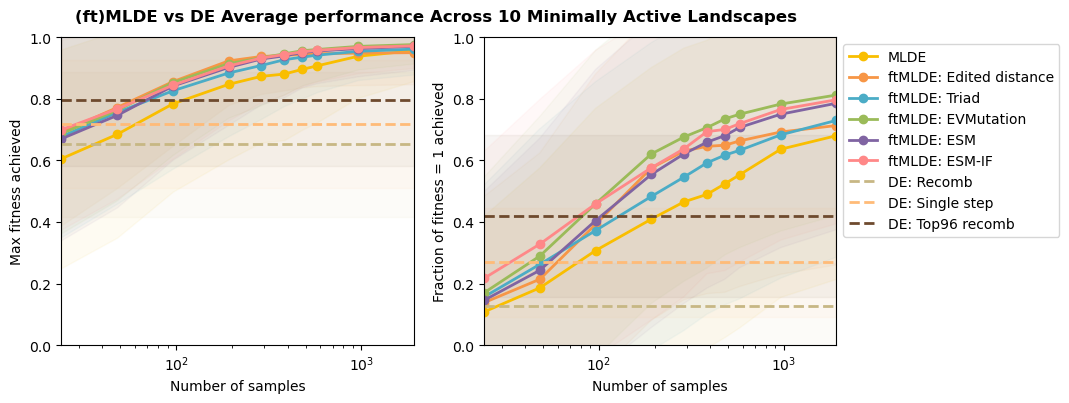

In [16]:
# for avg cross number of samples

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
mlde_color_list = ["yellow", "orange", "blue", "green", "purple", "red"]

for ax, mlde_metric, de_metric, y_label in zip(
    axes,
    ["top_maxes", "if_truemaxs"],
    ["mean_all", "fraction_max"],
    ["Max fitness", "Fraction of fitness = 1"],
):

    for i, (mlde_opts, mlde_df) in enumerate(avg_mlde_df_dict.items()):

        ax.plot(
            mlde_df["n_sample"],
            mlde_df[f"{mlde_metric}_mean"],
            label=mlde_opts,
            marker="o",
            linestyle="solid",
            linewidth=2,
            color=PRESENTATION_PALETTE_SATURATE[mlde_color_list[i]],
        )
        ax.fill_between(
            mlde_df["n_sample"],
            mlde_df[f"{mlde_metric}_mean"] - mlde_df[f"{mlde_metric}_std"],
            mlde_df[f"{mlde_metric}_mean"] + mlde_df[f"{mlde_metric}_std"],
            color=PRESENTATION_PALETTE_SATURATE[mlde_color_list[i]],
            alpha=0.05,
        )

    for de in DE_TYPES:
        ax.axhline(
            de_avg.loc[de, f"{de_metric}_mean"],
            label=f"DE: {DE_LEGEND_MAP[de]}",
            color=DE_COLORS[de],
            linestyle="dashed",
            linewidth=2,
        )
        ax.fill_between(
            N_SAMPLE_LIST,
            de_avg.loc[de, f"{de_metric}_mean"] - de_avg.loc[de, f"{de_metric}_std"],
            de_avg.loc[de, f"{de_metric}_mean"] + de_avg.loc[de, f"{de_metric}_std"],
            color=DE_COLORS[de],
            alpha=0.05,
        )

    ax.set_xlim(N_SAMPLE_LIST[0], N_SAMPLE_LIST[-1])
    ax.set_ylim(0, 1.0)

    ax.set_xscale("log")
    ax.set_xlabel("Number of samples")
    ax.set_ylabel(f"{y_label} achieved")

    if ax == axes[1]:
        ax.legend(loc="upper left", bbox_to_anchor=(1, 1))

fig.suptitle(
    "(ft)MLDE vs DE Average performance Across 10 Minimally Active Landscapes", fontsize=12, fontweight="bold", y=0.95
)

Text(0.5, 0.95, '(ft)MLDE vs DE Average performance Across 14 landscapes')

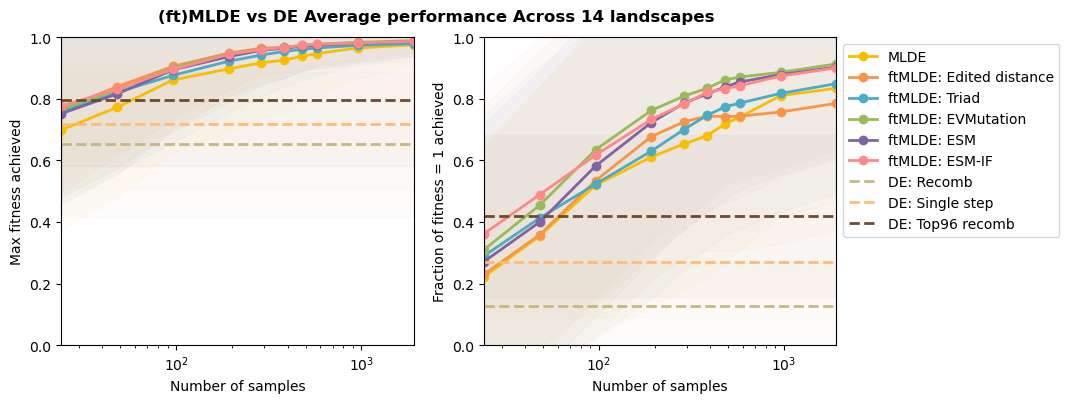

In [28]:
n_top = 384
avg_mlde_df_dict = {}

# just mlde
avg_mlde_df_dict["MLDE"] = get_mlde_avg_df(
    mlde_all, n_top, n_mut_cutoff="all", zs="none", active_lib_list=active_lib_list
)
avg_mlde_df_dict["ftMLDE: Edited distance"] = get_mlde_avg_df(
    mlde_all, n_top, n_mut_cutoff="double", zs="none", active_lib_list=active_lib_list
)

for zs in ZS_OPTS[1:]:
    avg_mlde_df_dict[f"ftMLDE: {ZS_OPTS_LEGEND[zs]}"] = get_mlde_avg_df(
        mlde_all, n_top, n_mut_cutoff="all", zs=zs, active_lib_list=active_lib_list
    )

# for avg cross number of samples

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
mlde_color_list = ["yellow", "orange", "blue", "green", "purple", "red"]

for ax, mlde_metric, de_metric, y_label in zip(
    axes,
    ["top_maxes", "if_truemaxs"],
    ["mean_all", "fraction_max"],
    ["Max fitness", "Fraction of fitness = 1"],
):

    for i, (mlde_opts, mlde_df) in enumerate(avg_mlde_df_dict.items()):

        ax.plot(
            mlde_df["n_sample"],
            mlde_df[f"{mlde_metric}_mean"],
            label=mlde_opts,
            marker="o",
            linestyle="solid",
            linewidth=2,
            color=PRESENTATION_PALETTE_SATURATE[mlde_color_list[i]],
        )
        ax.fill_between(
            mlde_df["n_sample"],
            mlde_df[f"{mlde_metric}_mean"] - mlde_df[f"{mlde_metric}_std"],
            mlde_df[f"{mlde_metric}_mean"] + mlde_df[f"{mlde_metric}_std"],
            color=PRESENTATION_PALETTE_SATURATE[mlde_color_list[i]],
            alpha=0.03,
        )

    for de in DE_TYPES:
        ax.axhline(
            de_avg.loc[de, f"{de_metric}_mean"],
            label=f"DE: {DE_LEGEND_MAP[de]}",
            color=DE_COLORS[de],
            linestyle="dashed",
            linewidth=2,
        )
        ax.fill_between(
            N_SAMPLE_LIST,
            de_avg.loc[de, f"{de_metric}_mean"] - de_avg.loc[de, f"{de_metric}_std"],
            de_avg.loc[de, f"{de_metric}_mean"] + de_avg.loc[de, f"{de_metric}_std"],
            color=DE_COLORS[de],
            alpha=0.03,
        )

    ax.set_xlim(N_SAMPLE_LIST[0], N_SAMPLE_LIST[-1])
    ax.set_ylim(0, 1.0)

    ax.set_xscale("log")
    ax.set_xlabel("Number of samples")
    ax.set_ylabel(f"{y_label} achieved")

    if ax == axes[1]:
        ax.legend(loc="upper left", bbox_to_anchor=(1, 1))

fig.suptitle(
    "(ft)MLDE vs DE Average performance Across 14 landscapes",
    fontsize=12,
    fontweight="bold",
    y=0.95,
)

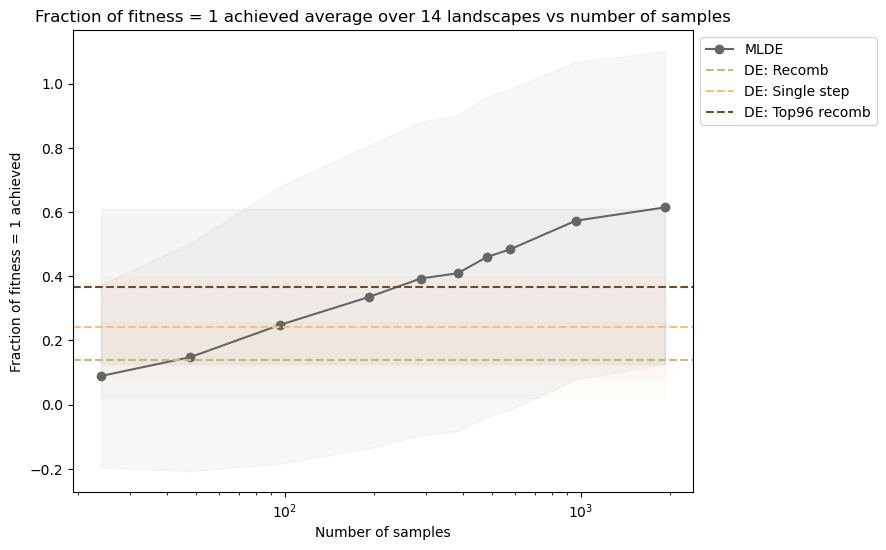

In [11]:
# for avg cross number of samples

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.plot(
    avg_mlde["n_sample"],
    avg_mlde["if_truemaxs_mean"],
    label="MLDE",
    marker="o",
    linestyle="solid",
    color=PRESENTATION_PALETTE_SATURATE["gray"],
)
ax.fill_between(
    avg_mlde["n_sample"],
    avg_mlde["if_truemaxs_mean"] - avg_mlde["if_truemaxs_std"],
    avg_mlde["if_truemaxs_mean"] + avg_mlde["if_truemaxs_std"],
    color=PRESENTATION_PALETTE_SATURATE["gray"],
    alpha=0.05,
)

for de in DE_TYPES:
    ax.axhline(
        de_avg.loc[de, "fraction_max_mean"],
        label=f"DE: {DE_LEGEND_MAP[de]}",
        color=DE_COLORS[de],
        linestyle="dashed",
    )
    ax.fill_between(
        avg_mlde["n_sample"],
        de_avg.loc[de, "fraction_max_mean"] - de_avg.loc[de, "fraction_max_std"],
        de_avg.loc[de, "fraction_max_mean"] + de_avg.loc[de, "fraction_max_std"],
        color=DE_COLORS[de],
        alpha=0.05,
    )

ax.set_xscale("log")
ax.set_xlabel("Number of samples")
ax.set_ylabel("Fraction of fitness = 1 achieved")
ax.set_title("Fraction of fitness = 1 achieved average over 14 landscapes vs number of samples")
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))

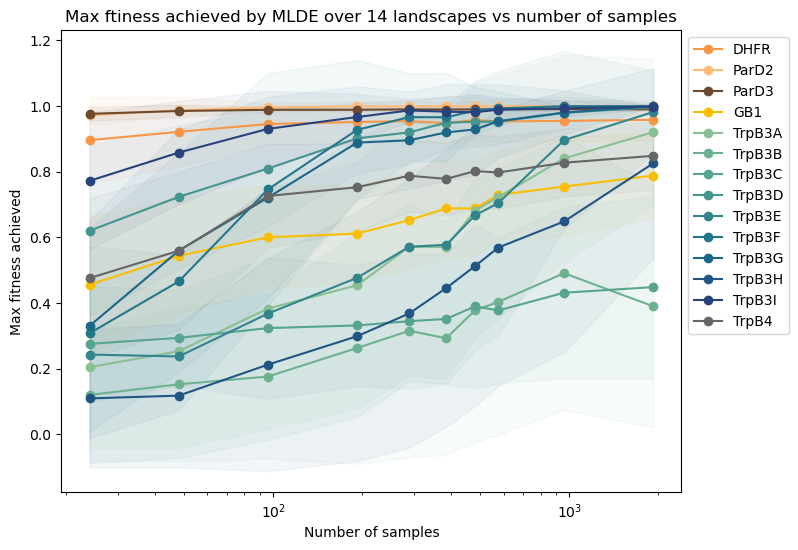

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))


# count number of mlde > de
for lib, lib_c in LIB_COLORS.items():
    avg_mlde = mlde_all[
        (mlde_all["zs"] == "none")
        & (mlde_all["n_top"] == 96)
        & (mlde_all["n_mut_cutoff"] == "all")
        & (mlde_all["lib"] == lib)
    ][["n_sample", "top_maxes", "if_truemaxs"]].groupby("n_sample").agg(["mean", "std"]).reset_index()
    avg_mlde.columns = ['{}_{}'.format(i, j) for i, j in avg_mlde.columns]
    avg_mlde = avg_mlde.rename(columns={'n_sample_': 'n_sample'})

    de_avg = de_all[["de_type", "mean_all", "fraction_max"]].groupby("de_type").agg(["mean", "std"])
    de_avg.columns = ['{}_{}'.format(i, j) for i, j in de_avg.columns]
    de_avg = de_avg.rename(columns={'de_type_': 'de_type'})

    ax.plot(
        avg_mlde["n_sample"],
        avg_mlde["top_maxes_mean"],
        label=lib,
        marker="o",
        linestyle="solid",
        color=lib_c,
    )
    ax.fill_between(
        avg_mlde["n_sample"],
        avg_mlde["top_maxes_mean"] - avg_mlde["top_maxes_std"],
        avg_mlde["top_maxes_mean"] + avg_mlde["top_maxes_std"],
        color=lib_c,
        alpha=0.05,
    )

    # for de in DE_TYPES:
    #     ax.axhline(
    #         de_avg.loc[de, "mean_all_mean"],
    #         label=f"DE: {DE_LEGEND_MAP[de]}",
    #         color=DE_COLORS[de],
    #         linestyle="dashed",
    #     )
    #     ax.fill_between(
    #         avg_mlde["n_sample"],
    #         de_avg.loc[de, "mean_all_mean"] - de_avg.loc[de, "mean_all_std"],
    #         de_avg.loc[de, "mean_all_mean"] + de_avg.loc[de, "mean_all_std"],
    #         color=DE_COLORS[de],
    #         alpha=  0.05,
    #     )

ax.set_xscale("log")
ax.set_xlabel("Number of samples")
ax.set_ylabel("Max fitness achieved")
ax.set_title("Max ftiness achieved by MLDE over 14 landscapes vs number of samples")
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))

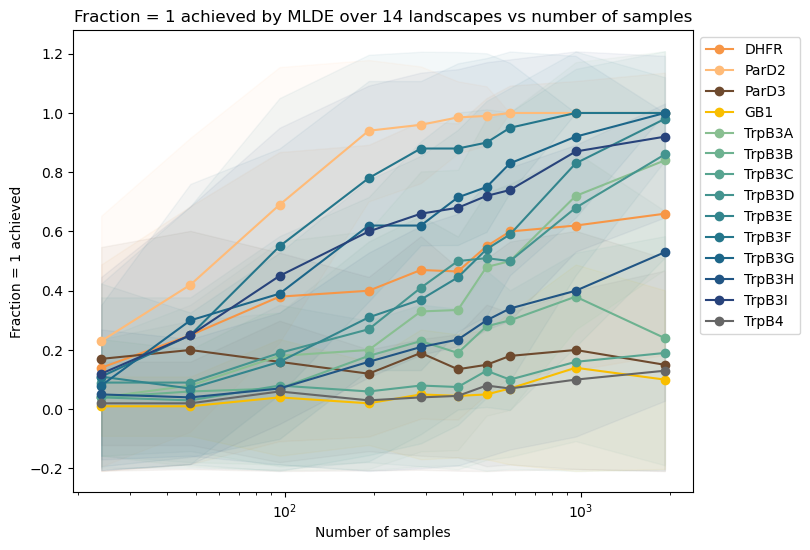

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))


# count number of mlde > de
for lib, lib_c in LIB_COLORS.items():
    avg_mlde = mlde_all[
        (mlde_all["zs"] == "none")
        & (mlde_all["n_top"] == 96)
        & (mlde_all["n_mut_cutoff"] == "all")
        & (mlde_all["lib"] == lib)
    ][["n_sample", "top_maxes", "if_truemaxs"]].groupby("n_sample").agg(["mean", "std"]).reset_index()
    avg_mlde.columns = ['{}_{}'.format(i, j) for i, j in avg_mlde.columns]
    avg_mlde = avg_mlde.rename(columns={'n_sample_': 'n_sample'})

    de_avg = de_all[["de_type", "mean_all", "fraction_max"]].groupby("de_type").agg(["mean", "std"])
    de_avg.columns = ['{}_{}'.format(i, j) for i, j in de_avg.columns]
    de_avg = de_avg.rename(columns={'de_type_': 'de_type'})

    ax.plot(
        avg_mlde["n_sample"],
        avg_mlde["if_truemaxs_mean"],
        label=lib,
        marker="o",
        linestyle="solid",
        color=lib_c,
    )
    ax.fill_between(
        avg_mlde["n_sample"],
        avg_mlde["if_truemaxs_mean"] - avg_mlde["if_truemaxs_std"],
        avg_mlde["if_truemaxs_mean"] + avg_mlde["if_truemaxs_std"],
        color=lib_c,
        alpha=0.05,
    )

    # for de in DE_TYPES:
    #     ax.axhline(
    #         de_avg.loc[de, "mean_all_mean"],
    #         label=f"DE: {DE_LEGEND_MAP[de]}",
    #         color=DE_COLORS[de],
    #         linestyle="dashed",
    #     )
    #     ax.fill_between(
    #         avg_mlde["n_sample"],
    #         de_avg.loc[de, "mean_all_mean"] - de_avg.loc[de, "mean_all_std"],
    #         de_avg.loc[de, "mean_all_mean"] + de_avg.loc[de, "mean_all_std"],
    #         color=DE_COLORS[de],
    #         alpha=  0.05,
    #     )

ax.set_xscale("log")
ax.set_xlabel("Number of samples")
ax.set_ylabel("Fraction = 1 achieved")
ax.set_title("Fraction = 1 achieved by MLDE over 14 landscapes vs number of samples")
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))

In [14]:
avg_mlde

,n_sample,top_maxes_mean,top_maxes_std,if_truemaxs_mean,if_truemaxs_std
0,24,0.476022,0.243110,0.020,0.140705
1,48,0.559382,0.240760,0.020,0.140705
2,96,0.726207,0.157845,0.060,0.238683
3,192,0.752871,0.132906,0.030,0.171447
4,288,0.787961,0.110229,0.040,0.196946
5,384,0.778225,0.111538,0.045,0.207824
6,480,0.802064,0.112643,0.080,0.272660
7,576,0.797841,0.111567,0.070,0.256432
8,960,0.827611,0.102466,0.100,0.301511
9,1920,0.848582,0.104002,0.130,0.337998


In [15]:
def get_min_sample(df, x):
    # Filter the DataFrame to find rows where 'top_maxes_mean' exceeds x
    filtered_df = df[df["top_maxes_mean"] > x]

    # Find the minimum 'n_sample' from the filtered DataFrame
    min_n_sample = filtered_df["n_sample"].min()

    return min_n_sample

In [17]:
# init dataframe with lib, 3 different de
# count number of mlde > de
count_n_df = pd.DataFrame(columns=["lib"] + DE_TYPES)

for lib, lib_c in LIB_COLORS.items():
    lib_mlde = mlde_all[
        (mlde_all["zs"] == "none")
        & (mlde_all["n_top"] == 96)
        & (mlde_all["n_mut_cutoff"] == "all")
        & (mlde_all["lib"] == lib)
    ][["n_sample", "top_maxes", "if_truemaxs"]].groupby("n_sample").agg(["mean", "std"]).reset_index()
    lib_mlde.columns = ['{}_{}'.format(i, j) for i, j in lib_mlde.columns]
    lib_mlde = lib_mlde.rename(columns={'n_sample_': 'n_sample'})

    append_dict = {"lib": lib}

    for de in DE_TYPES:
        de_val = de_all[(de_all["de_type"] == de) & (de_all["lib"] == lib)]["mean_all"].values[0]
        append_dict[de] = get_min_sample(lib_mlde, de_val)
    
    count_n_df = count_n_df._append(append_dict, ignore_index=True)

# count_n_df = count_n_df.fillna(1e3)
count_n_df

,lib,recomb_SSM,single_step_DE,top96_SSM
0,DHFR,24,24,NaN
1,ParD2,24,24,96
2,ParD3,24,48,96
3,GB1,24,96,192
4,TrpB3A,192,192,192
5,TrpB3B,288,288,288
6,TrpB3C,480,480,480
7,TrpB3D,48,96,192
8,TrpB3E,96,96,96
9,TrpB3F,96,96,192


In [22]:
dhfr_mlde = mlde_all[
        (mlde_all["zs"] == "none")
        & (mlde_all["n_top"] == 96)
        & (mlde_all["n_mut_cutoff"] == "all")
        & (mlde_all["lib"] == "DHFR")
    ][["n_sample", "top_maxes", "if_truemaxs"]].groupby("n_sample").agg(["mean", "std"]).reset_index()

dhfr_mlde.columns = ['{}_{}'.format(i, j) for i, j in dhfr_mlde.columns]
dhfr_mlde = dhfr_mlde.rename(columns={'n_sample_': 'n_sample'})

dhfr_mlde

,n_sample,top_maxes_mean,top_maxes_std,if_truemaxs_mean,if_truemaxs_std
0,24,0.896272,0.130844,0.140,0.348735
1,48,0.921698,0.106865,0.250,0.435194
2,96,0.945518,0.062748,0.380,0.487832
3,192,0.951679,0.062065,0.400,0.492366
4,288,0.954229,0.062095,0.470,0.501614
5,384,0.948174,0.062971,0.465,0.500025
6,480,0.957699,0.058716,0.550,0.500000
7,576,0.953406,0.062948,0.600,0.492366
8,960,0.955000,0.062368,0.620,0.487832
9,1920,0.958293,0.061504,0.660,0.476095


In [23]:
for de in DE_TYPES:
    de_val = de_all[(de_all["de_type"] == de) & (de_all["lib"] == "DHFR")]["mean_all"].values[0]
    append_dict[de] = get_min_sample(dhfr_mlde, de_val)

    print(de_val, append_dict[de])

0.8514627389896271 24
0.8899215350363915 24
0.9593048636477788 nan


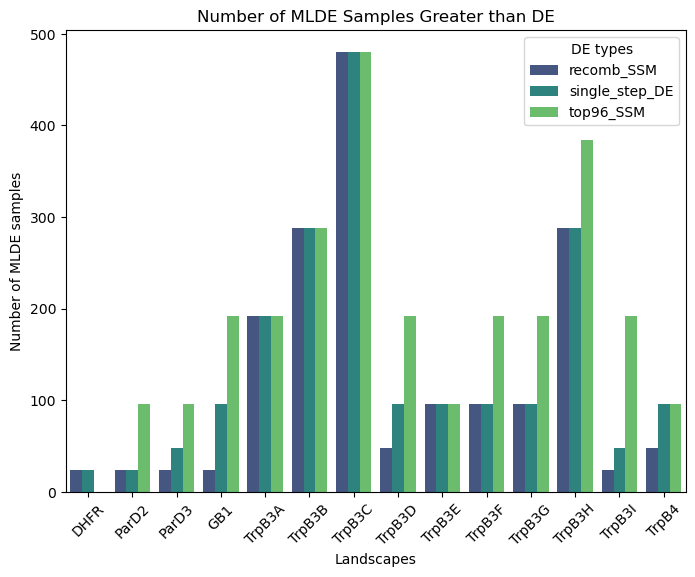

In [39]:
# Melt and plot
df_melted = count_n_df.melt(id_vars="lib", var_name="DE type", value_name="Number of samples")
plt.figure(figsize=(8, 6))
barplot = sns.barplot(
    x="lib", y="Number of samples", hue="DE type", data=df_melted, palette="viridis"
)
plt.xticks(rotation=45)
plt.title("Number of MLDE Samples Greater than DE")
plt.xlabel("Landscapes")
plt.ylabel("Number of MLDE samples")
plt.legend(title="DE types")

# Annotate 'Unbounded'
for p in barplot.patches:
    height = p.get_height()
    if height >= 1e9:  # Check if the patch height corresponds to the 'unbounded' value
        barplot.annotate(
            "Unbounded",
            (p.get_x() + p.get_width() / 2.0, height),
            ha="center",
            va="center",
            fontsize=9,
            color="black",
            rotation=90,
            xytext=(0, 5),
            textcoords="offset points",
        )
plt.show()

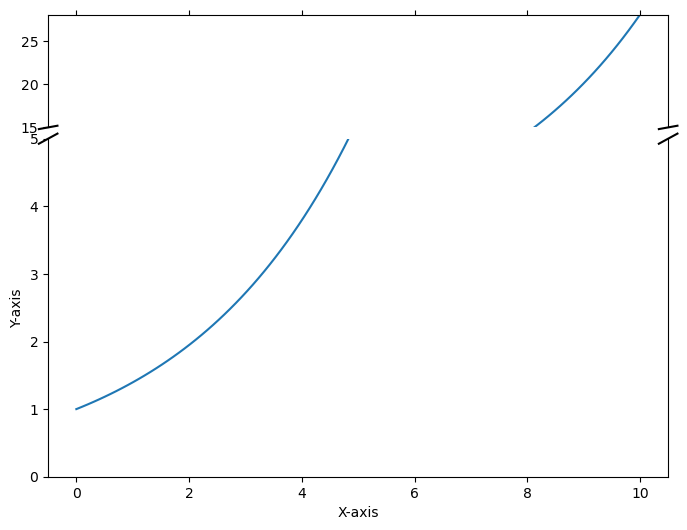

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
x = np.linspace(0, 10, 100)
y = np.exp(x / 3)

# Create a figure and a grid of subplots
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6),
                               gridspec_kw={'height_ratios': [1, 3], 'hspace': 0.05})

# Plot the lower part in ax1
ax1.plot(x, y)
ax1.set_ylim(15, max(y))  # Set the limits for the upper plot
ax1.spines['bottom'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # Don't put tick labels at the top

# Plot the upper part in ax2
ax2.plot(x, y)
ax2.set_ylim(0, 5)  # Set the limits for the lower plot
ax2.spines['top'].set_visible(False)

# Add diagonal lines to indicate the break in the y-axis
d = .015  # how big to make the diagonal lines in axes coordinates
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()
